##Hamare project ka main problem and objective kya hai -  To analyze district level agricultural crop holdings data and build a predictive model to estimate (total_ar_distict_holdings) ham kitne percent holdings ke upar crops grow kar sakte hai.|

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


#Below given is the data set of our project which has 16 columns and 17 lakh rows

In [ ]:
df = pd.read_csv("/content/district-level-agcensus-crop.csv")

In [ ]:
df

,id,year,state_name,state_code,district_name,district_code,social_group,farm_size_class,farm_size_category,crop_name,crop_code,crop_type,hold_no_district,irr_ar_district,unirr_ar_district,total_ar_district
0,0,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,< 0.5,Marginal,Paddy,101,Cereals,0.0,0.00,0.0,0.00
1,1,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,0.5-1.0,Marginal,Paddy,101,Cereals,0.0,0.00,0.0,0.00
2,2,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,1.0-2.0,Small,Paddy,101,Cereals,0.0,0.00,0.0,0.00
3,3,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,2.0-3.0,Semi-Medium,Paddy,101,Cereals,0.0,0.00,0.0,0.00
4,4,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,3.0-4.0,Semi-Medium,Paddy,101,Cereals,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689931,1689931,2015-16,West Bengal,19,24 Paraganas South,304,Institutional,4.0-5.0,Medium,Rapeseed & Mustard (Toria/Taramira),1004,Oilseeds,0.0,0.00,0.0,0.00
1689932,1689932,2015-16,West Bengal,19,24 Paraganas South,304,Institutional,5.0-7.5,Medium,Rapeseed & Mustard (Toria/Taramira),1004,Oilseeds,0.0,0.00,0.0,0.00
1689933,1689933,2015-16,West Bengal,19,24 Paraganas South,304,Institutional,7.5-10.0,Medium,Rapeseed & Mustard (Toria/Taramira),1004,Oilseeds,0.0,0.00,0.0,0.00
1689934,1689934,2015-16,West Bengal,19,24 Paraganas South,304,Institutional,10.0-20.0,Large,Rapeseed & Mustard (Toria/Taramira),1004,Oilseeds,1.0,1.42,0.0,1.42


#Below Given is the top 5 rows data

In [ ]:
df.head()

,id,year,state_name,state_code,district_name,district_code,social_group,farm_size_class,farm_size_category,crop_name,crop_code,crop_type,hold_no_district,irr_ar_district,unirr_ar_district,total_ar_district
0,0,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,< 0.5,Marginal,Paddy,101,Cereals,0.0,0.0,0.0,0.0
1,1,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,0.5-1.0,Marginal,Paddy,101,Cereals,0.0,0.0,0.0,0.0
2,2,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,1.0-2.0,Small,Paddy,101,Cereals,0.0,0.0,0.0,0.0
3,3,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,2.0-3.0,Semi-Medium,Paddy,101,Cereals,0.0,0.0,0.0,0.0
4,4,2010-11,Andaman And Nicobar Islands,35,Nicobars,603,Institutional,3.0-4.0,Semi-Medium,Paddy,101,Cereals,0.0,0.0,0.0,0.0


#below Given bottom 5 rows ka data

In [ ]:
df.tail()

,id,year,state_name,state_code,district_name,district_code,social_group,farm_size_class,farm_size_category,crop_name,crop_code,crop_type,hold_no_district,irr_ar_district,unirr_ar_district,total_ar_district
1689931,1689931,2015-16,West Bengal,19,24 Paraganas South,304,Institutional,4.0-5.0,Medium,Rapeseed & Mustard (Toria/Taramira),1004,Oilseeds,0.0,0.00,0.0,0.00
1689932,1689932,2015-16,West Bengal,19,24 Paraganas South,304,Institutional,5.0-7.5,Medium,Rapeseed & Mustard (Toria/Taramira),1004,Oilseeds,0.0,0.00,0.0,0.00
1689933,1689933,2015-16,West Bengal,19,24 Paraganas South,304,Institutional,7.5-10.0,Medium,Rapeseed & Mustard (Toria/Taramira),1004,Oilseeds,0.0,0.00,0.0,0.00
1689934,1689934,2015-16,West Bengal,19,24 Paraganas South,304,Institutional,10.0-20.0,Large,Rapeseed & Mustard (Toria/Taramira),1004,Oilseeds,1.0,1.42,0.0,1.42
1689935,1689935,2015-16,West Bengal,19,24 Paraganas South,304,Institutional,> 20.0,Large,Rapeseed & Mustard (Toria/Taramira),1004,Oilseeds,0.0,0.00,0.0,0.00


In [ ]:
df.shape


(1689936, 16)

#Below we have mentioned the type of the data of all the 16 columns , they are majourly of 3 types only (int , float and object)

In [ ]:
df.dtypes

,0
id,int64
year,object
state_name,object
state_code,int64
district_name,object
district_code,int64
social_group,object
farm_size_class,object
farm_size_category,object
crop_name,object


#Below we are checking if there is any null value present in our data set , there is none

In [ ]:
df.isnull().sum()

,0
id,0
year,0
state_name,0
state_code,0
district_name,0
district_code,0
social_group,0
farm_size_class,0
farm_size_category,0
crop_name,0


#Below we have (df.describe) summary statistics view karne ke liye of my dataset, it helps me to understand the overall numerical features

#EX:-  average value, range , hamara data set kitna spead hai, koi data quality issues hai kya (missing values and all) etc etc

In [ ]:
df.describe()

,id,state_code,district_code,crop_code,hold_no_district,irr_ar_district,unirr_ar_district,total_ar_district
count,1.689936e+06,1.689936e+06,1.689936e+06,1.689936e+06,1.689936e+06,1.689936e+06,1.689936e+06,1.689936e+06
mean,8.449675e+05,1.957893e+01,3.619181e+02,6.565876e+02,4.033157e+02,1.296535e+02,1.384980e+02,2.681515e+02
std,4.878426e+05,9.594919e+00,1.872902e+02,4.479759e+02,5.056217e+03,1.521448e+03,1.647428e+03,2.459679e+03
min,0.000000e+00,1.000000e+00,1.000000e+00,1.010000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.224838e+05,9.000000e+00,1.910000e+02,2.050000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.449675e+05,2.100000e+01,3.830000e+02,6.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.267451e+06,2.800000e+01,5.330000e+02,1.001000e+03,2.000000e+01,5.400000e-01,1.840000e+00,8.960000e+00
max,1.689935e+06,3.800000e+01,7.040000e+02,1.888000e+03,6.643720e+05,2.134809e+05,3.028489e+05,3.062851e+05


# Below I have mentioned all the crop types present in my data set , there are total 17 crop types present in my dataset

In [ ]:
df["crop_type"].unique()

array(['Cereals', 'Spices', 'Vegetable', 'Oilseeds', 'Fruits',
       'Plantation Crops', 'Non-Food', 'Pulses', 'Sugar',
       'Other Food Crop', 'Fiber Crops', 'Flowers', 'Medicinal',
       'Aromatic', 'Fodder', 'Drugs And Narcotics', 'Dyes And Tan'],
      dtype=object)

#Below listed all the 16 column names present in our data set

In [ ]:
df.columns

Index(['id', 'year', 'state_name', 'state_code', 'district_name',
       'district_code', 'social_group', 'farm_size_class',
       'farm_size_category', 'crop_name', 'crop_code', 'crop_type',
       'hold_no_district', 'irr_ar_district', 'unirr_ar_district',
       'total_ar_district'],
      dtype='object')

#Below code has Generated histogram for (no of holdings-distric wise, irr and non irrigated area of district)

as we can see -


1)Most of the district areas are small (near zero to 50,000).

2)Very few districts have large areas (100,000–300,000).

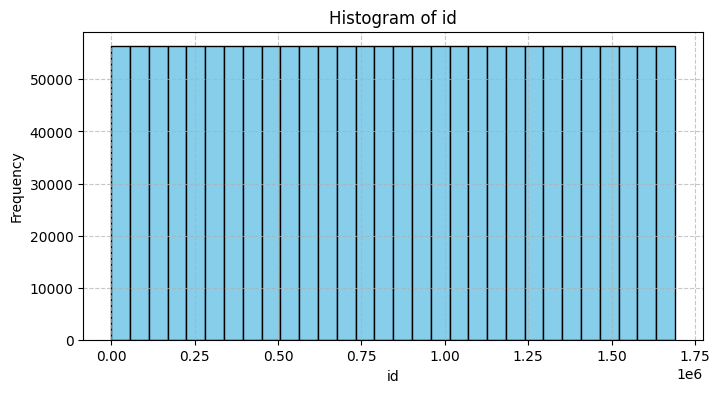

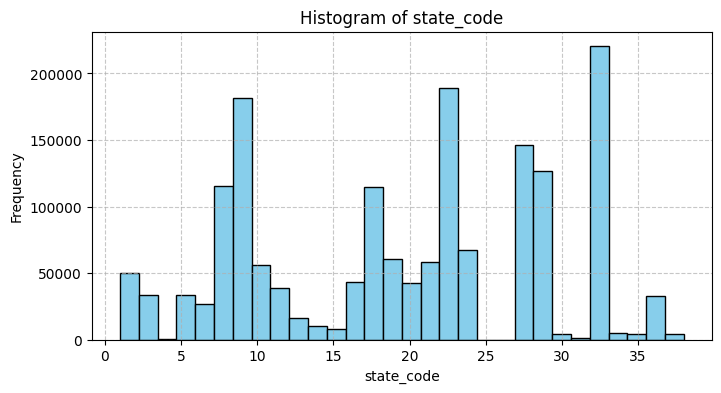

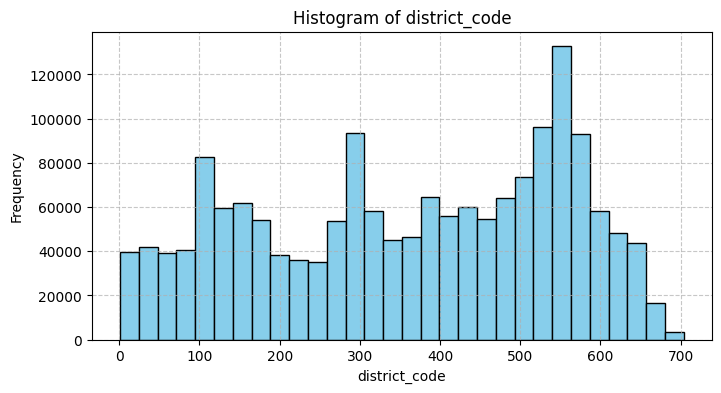

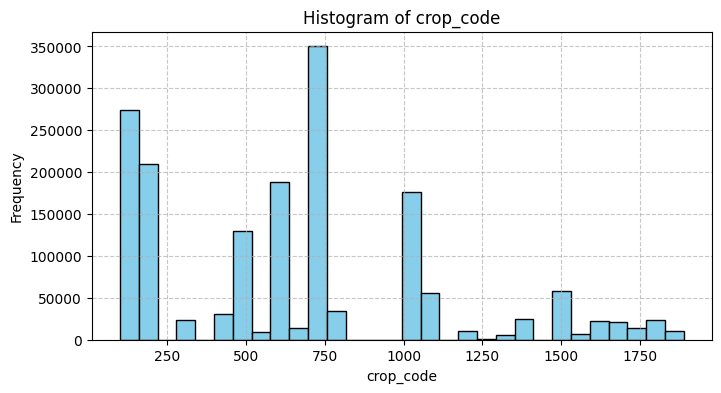

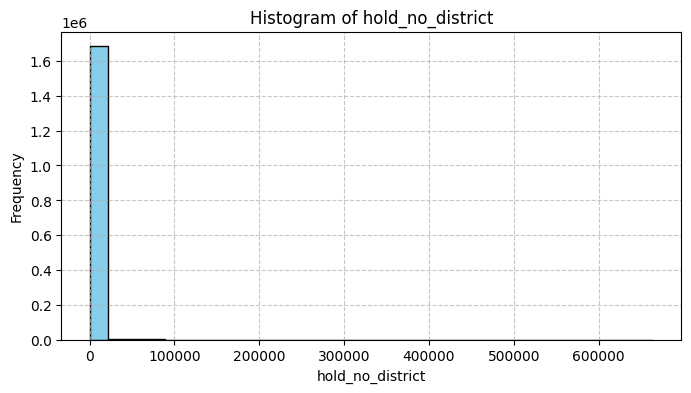

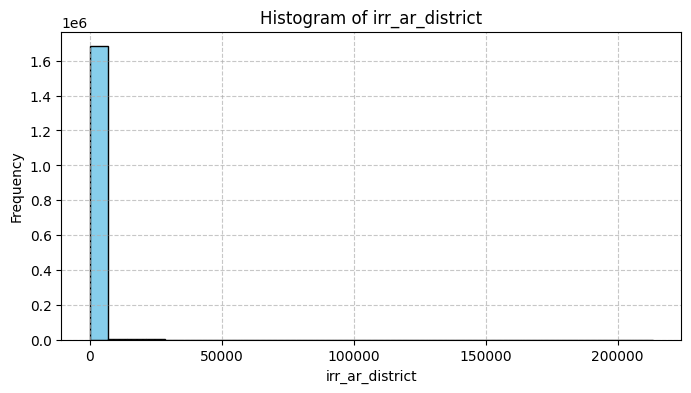

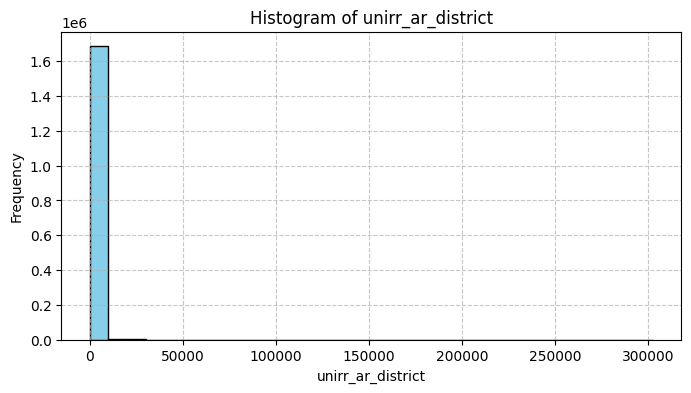

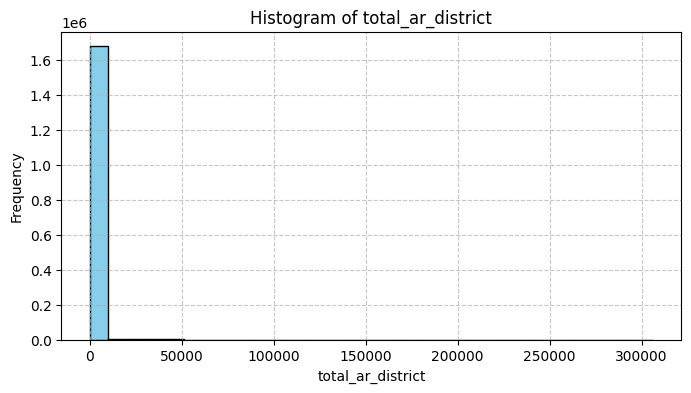

In [ ]:
# Assuming your DataFrame is named df

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


# Below I have seperated all theree for better understanding

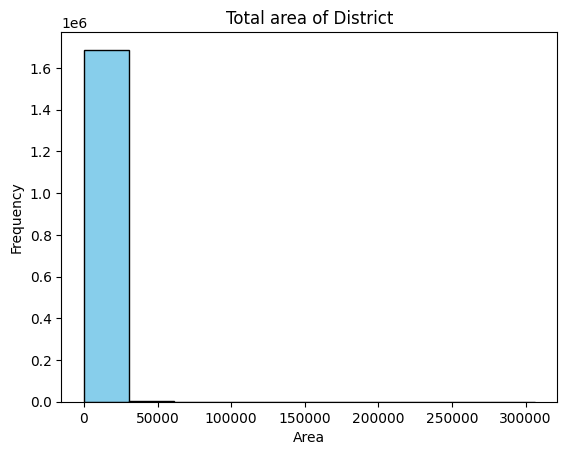

In [ ]:
plt.hist(df['total_ar_district'], bins=10, color='skyblue', edgecolor='black')
plt.title('Total area of District')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

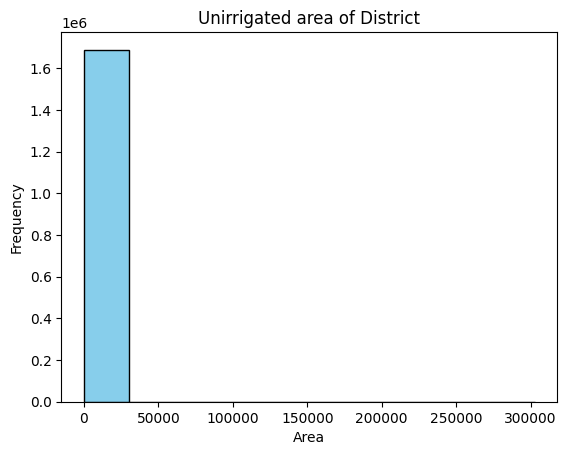

In [ ]:
plt.hist(df['unirr_ar_district'], bins=10, color='skyblue', edgecolor='black')
plt.title('Unirrigated area of District')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

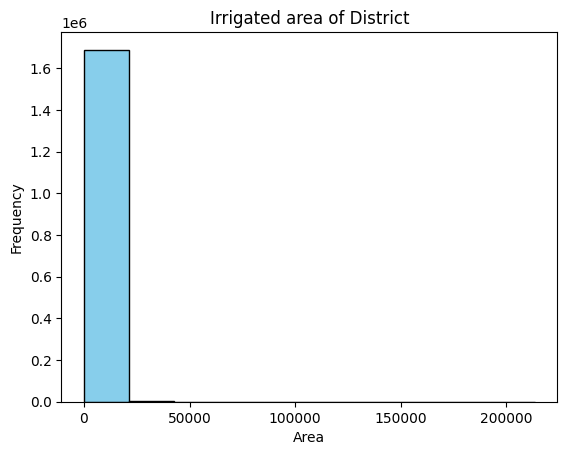

In [ ]:
plt.hist(df['irr_ar_district'], bins=10, color='skyblue', edgecolor='black')
plt.title('Irrigated area of District')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

#The below given is a correlation matrix between three numeric columns (irr_ar, unirr_ar, total_ar)

it tells you how strongly each pair of feature is related to each other-m matlab vo kitna ek sath chalte hai

(irr,total ar)
(unirr, total)
(irr, unirr)

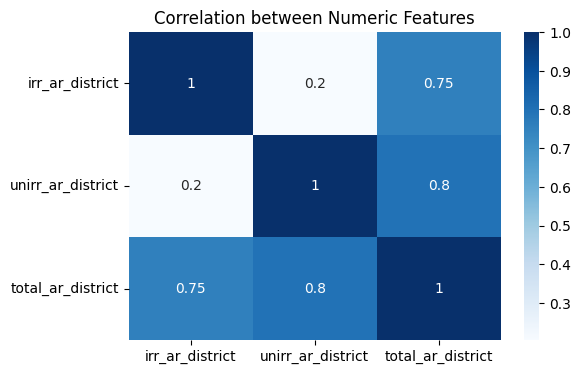

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['irr_ar_district', 'unirr_ar_district', 'total_ar_district']].corr(), annot=True, cmap='Blues')
plt.title("Correlation between Numeric Features")
plt.show()

##Below is a bar chart which iis showing ki total area me konse types ke crops jyada grow kiye jate hai aur kkonse kam

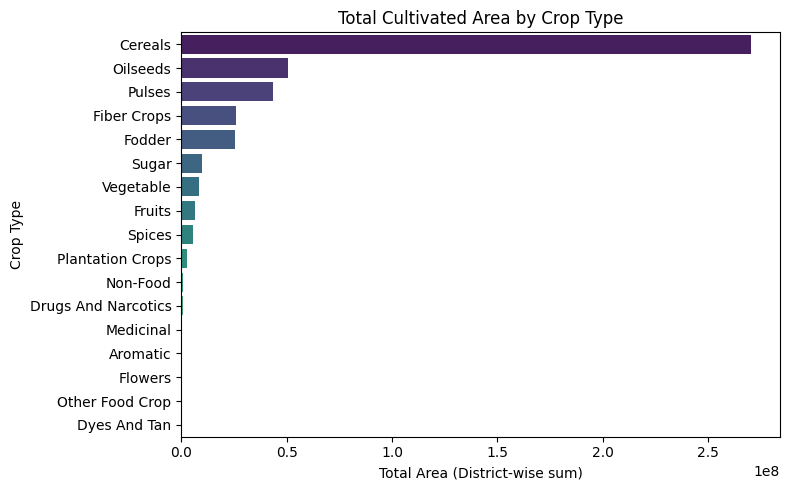

In [ ]:
plt.figure(figsize=(8, 5))
crop_area = df.groupby("crop_type")["total_ar_district"].sum().sort_values(ascending=False)
sns.barplot(x=crop_area.values, y=crop_area.index, palette="viridis")
plt.title("Total Cultivated Area by Crop Type")
plt.xlabel("Total Area (District-wise sum)")
plt.ylabel("Crop Type")
plt.tight_layout()
plt.show()

##Below Given is the overall distribution of Total area in percentage for Irrigated area and unirrigated area


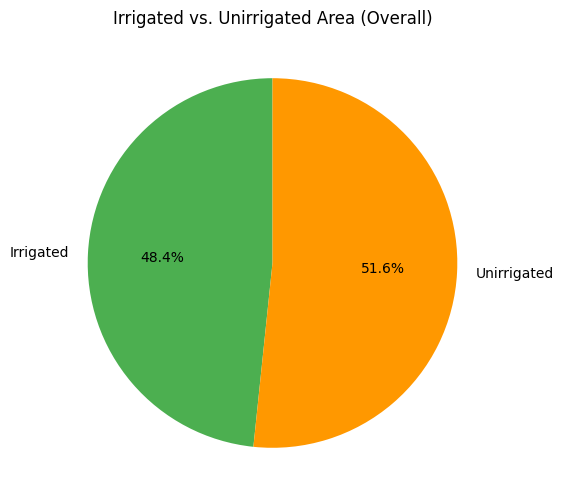

In [ ]:
plt.figure(figsize=(6, 6))
avg_irr = df[["irr_ar_district", "unirr_ar_district"]].sum()
plt.pie(avg_irr, labels=["Irrigated", "Unirrigated"],
        autopct="%1.1f%%", startangle=90, colors=["#4caf50", "#ff9800"])
plt.title("Irrigated vs. Unirrigated Area (Overall)")
plt.show()

##Below we have created a Graph which is showing the total cultivated area based on different farm size categories.



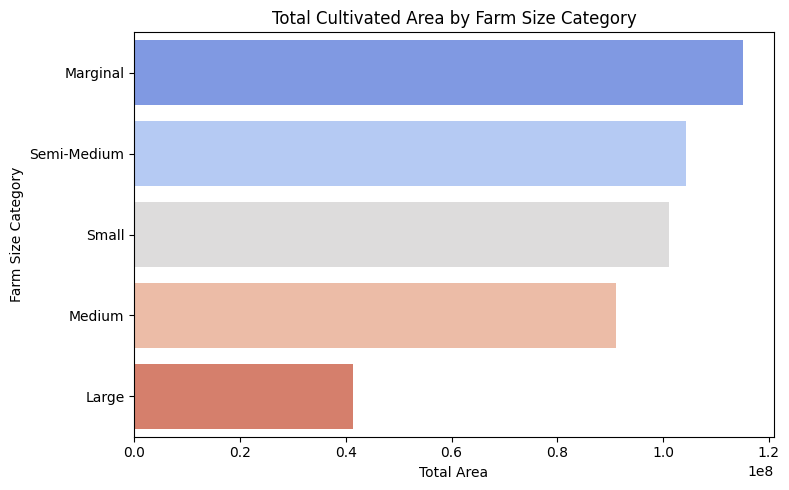

In [ ]:
plt.figure(figsize=(8, 5))
farm_area = df.groupby("farm_size_category")["total_ar_district"].sum().sort_values(ascending=False)
sns.barplot(x=farm_area.values, y=farm_area.index, palette="coolwarm")
plt.title("Total Cultivated Area by Farm Size Category")
plt.xlabel("Total Area")
plt.ylabel("Farm Size Category")
plt.tight_layout()
plt.show()

#Below listed which social groups own the perticular share of **land**

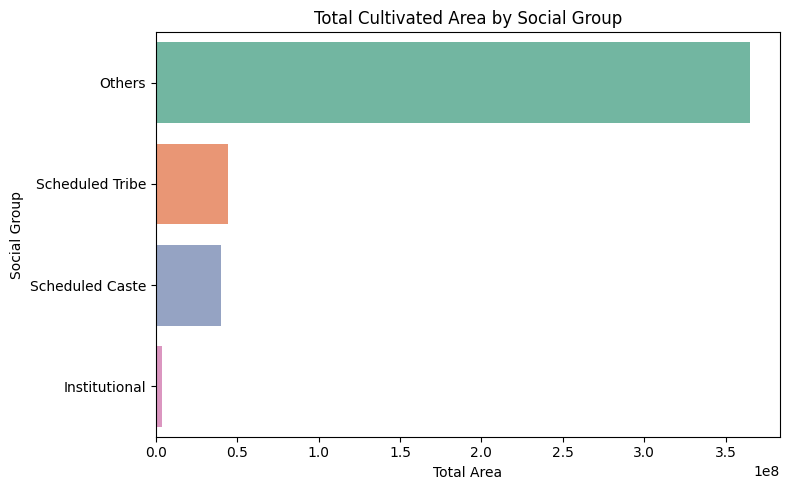

In [ ]:
plt.figure(figsize=(8, 5))
social_area = df.groupby("social_group")["total_ar_district"].sum().sort_values(ascending=False)
sns.barplot(x=social_area.values, y=social_area.index, palette="Set2")
plt.title("Total Cultivated Area by Social Group")
plt.xlabel("Total Area")
plt.ylabel("Social Group")
plt.tight_layout()
plt.show()

#Below given are the insights of crops grown by which typws of social groups


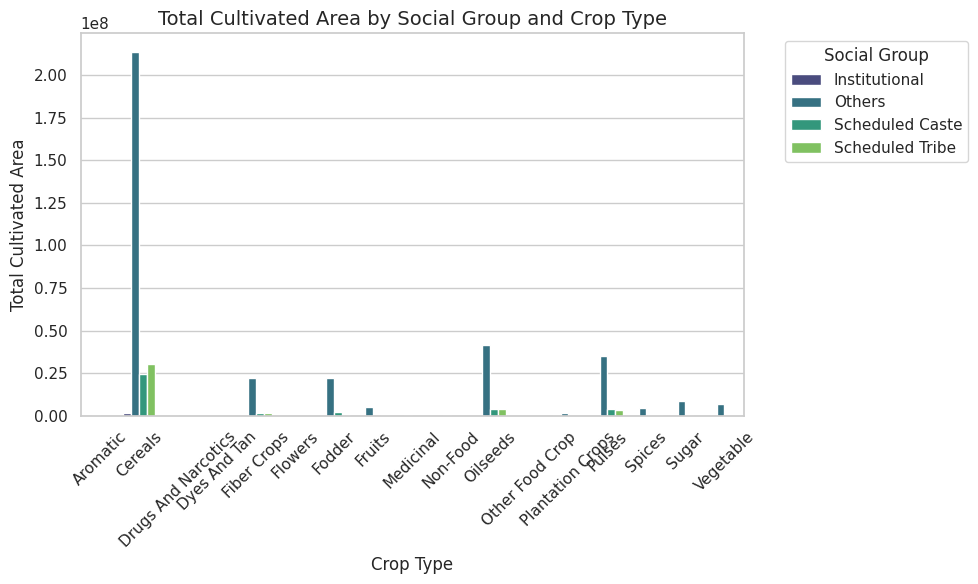

In [ ]:
# Group data: total cultivated area by social group and crop type
group_data = (
    df.groupby(['social_group', 'crop_type'])['total_ar_district']
    .sum()
    .reset_index()
)

# Set up plot style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create grouped bar plot
sns.barplot(
    data=group_data,
    x='crop_type',
    y='total_ar_district',
    hue='social_group',
    palette='viridis'
)

# Labels and title
plt.title("Total Cultivated Area by Social Group and Crop Type", fontsize=14)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Total Cultivated Area", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Social Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#---Above are the Normal overall insights of the data, Now we will do detailed data analysis of a perticular district of a state---


✅ Top 10 Crops by Total Cultivated Area for Each State:

                      state_name               crop_name  total_ar_district
73   Andaman And Nicobar Islands                   Paddy           10153.50
11   Andaman And Nicobar Islands  Betelnuts (Areca Nuts)            7580.88
28   Andaman And Nicobar Islands                 Coconut            5991.18
45   Andaman And Nicobar Islands            Kharif Paddy            4638.00
3    Andaman And Nicobar Islands                  Banana            1124.90
72   Andaman And Nicobar Islands        Other Vegetables             536.91
104  Andaman And Nicobar Islands                    Urad             496.55
53   Andaman And Nicobar Islands                   Moong             490.22
50   Andaman And Nicobar Islands                 Mangoes             300.62
64   Andaman And Nicobar Islands            Other Fruits             153.16
196               Andhra Pradesh                   Paddy         5610598.79
153               Andhra Prades

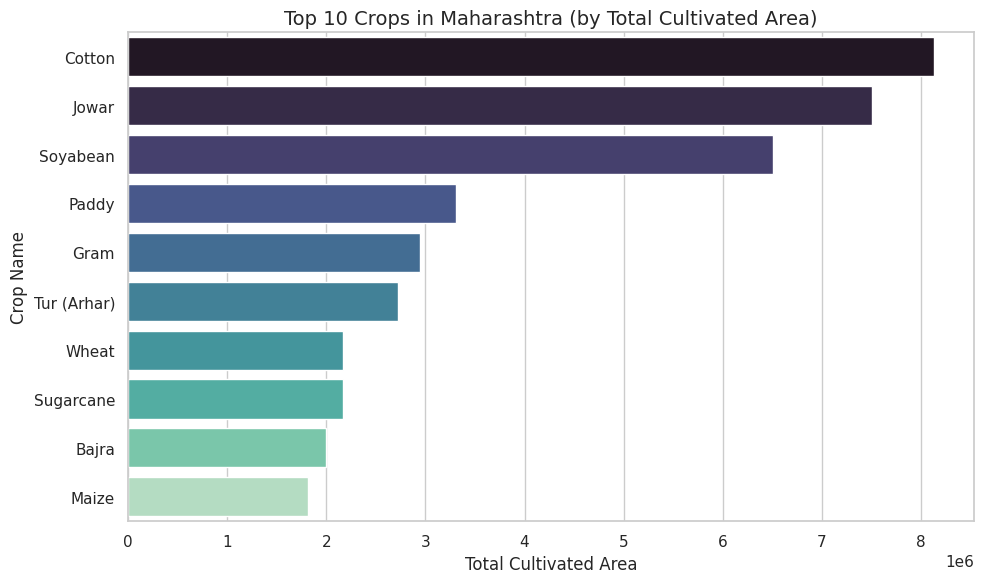

In [ ]:
# -------------------------------------------------------------------
# 🧮 STEP 1: Compute total cultivated area of each crop per state
# -------------------------------------------------------------------
state_crop_area = (
    df.groupby(['state_name', 'crop_name'])['total_ar_district']
    .sum()
    .reset_index()
)

# -------------------------------------------------------------------
# 🏆 STEP 2: Get top 10 crops per state
# -------------------------------------------------------------------
top10_crops_per_state = (
    state_crop_area.sort_values(['state_name', 'total_ar_district'], ascending=[True, False])
    .groupby('state_name')
    .head(10)
)

# Display the table of top 10 crops per state
print("✅ Top 10 Crops by Total Cultivated Area for Each State:\n")
print(top10_crops_per_state.head(30))  # show sample

# -------------------------------------------------------------------
# 📊 STEP 3: Visualization — Top 10 Crops for a Selected State
# -------------------------------------------------------------------
# Example: Change 'Assam' to any state you want
selected_state = "Maharashtra"

state_data = top10_crops_per_state[top10_crops_per_state['state_name'] == selected_state]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=state_data,
    x='total_ar_district',
    y='crop_name',
    palette='mako'
)
plt.title(f"Top 10 Crops in {selected_state} (by Total Cultivated Area)", fontsize=14)
plt.xlabel("Total Cultivated Area")
plt.ylabel("Crop Name")
plt.tight_layout()
plt.show()

✅ Top 10 Crops by Total Cultivated Area for Each State:

                      state_name               crop_name  total_ar_district
73   Andaman And Nicobar Islands                   Paddy           10153.50
11   Andaman And Nicobar Islands  Betelnuts (Areca Nuts)            7580.88
28   Andaman And Nicobar Islands                 Coconut            5991.18
45   Andaman And Nicobar Islands            Kharif Paddy            4638.00
3    Andaman And Nicobar Islands                  Banana            1124.90
72   Andaman And Nicobar Islands        Other Vegetables             536.91
104  Andaman And Nicobar Islands                    Urad             496.55
53   Andaman And Nicobar Islands                   Moong             490.22
50   Andaman And Nicobar Islands                 Mangoes             300.62
64   Andaman And Nicobar Islands            Other Fruits             153.16
196               Andhra Pradesh                   Paddy         5610598.79
153               Andhra Prades

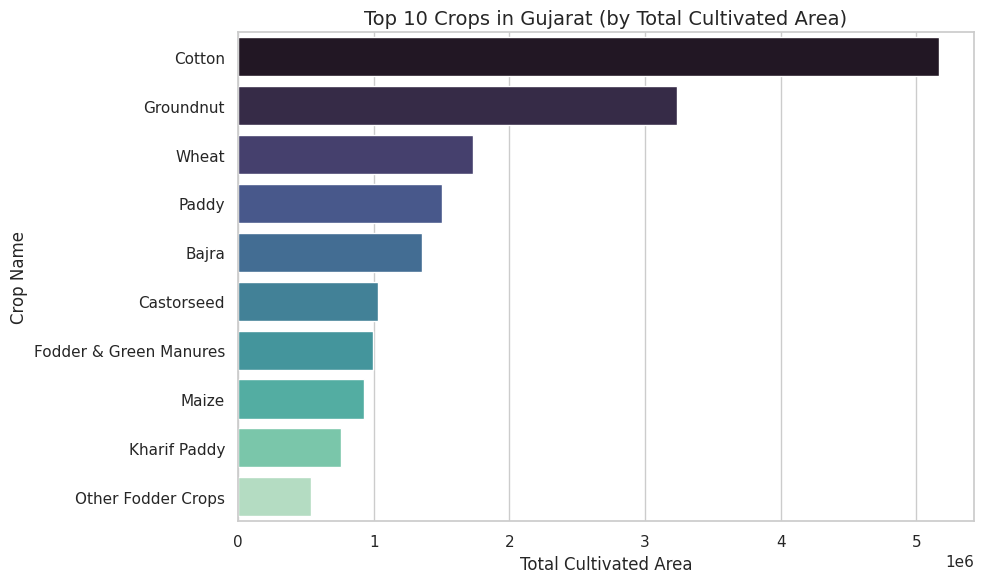

In [ ]:
# -------------------------------------------------------------------
# 🧮 STEP 1: Compute total cultivated area of each crop per state
# -------------------------------------------------------------------
state_crop_area = (
    df.groupby(['state_name', 'crop_name'])['total_ar_district']
    .sum()
    .reset_index()
)

# -------------------------------------------------------------------
# 🏆 STEP 2: Get top 10 crops per state
# -------------------------------------------------------------------
top10_crops_per_state = (
    state_crop_area.sort_values(['state_name', 'total_ar_district'], ascending=[True, False])
    .groupby('state_name')
    .head(10)
)

# Display the table of top 10 crops per state
print("✅ Top 10 Crops by Total Cultivated Area for Each State:\n")
print(top10_crops_per_state.head(30))  # show sample

# -------------------------------------------------------------------
# 📊 STEP 3: Visualization — Top 10 Crops for a Selected State
# -------------------------------------------------------------------
# Example: Change 'Assam' to any state you want
selected_state = "Gujarat"

state_data = top10_crops_per_state[top10_crops_per_state['state_name'] == selected_state]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=state_data,
    x='total_ar_district',
    y='crop_name',
    palette='mako'
)
plt.title(f"Top 10 Crops in {selected_state} (by Total Cultivated Area)", fontsize=14)
plt.xlabel("Total Cultivated Area")
plt.ylabel("Crop Name")
plt.tight_layout()
plt.show()

✅ Top 10 Crops by Total Cultivated Area for Each State:

                      state_name               crop_name  total_ar_district
73   Andaman And Nicobar Islands                   Paddy           10153.50
11   Andaman And Nicobar Islands  Betelnuts (Areca Nuts)            7580.88
28   Andaman And Nicobar Islands                 Coconut            5991.18
45   Andaman And Nicobar Islands            Kharif Paddy            4638.00
3    Andaman And Nicobar Islands                  Banana            1124.90
72   Andaman And Nicobar Islands        Other Vegetables             536.91
104  Andaman And Nicobar Islands                    Urad             496.55
53   Andaman And Nicobar Islands                   Moong             490.22
50   Andaman And Nicobar Islands                 Mangoes             300.62
64   Andaman And Nicobar Islands            Other Fruits             153.16
196               Andhra Pradesh                   Paddy         5610598.79
153               Andhra Prades

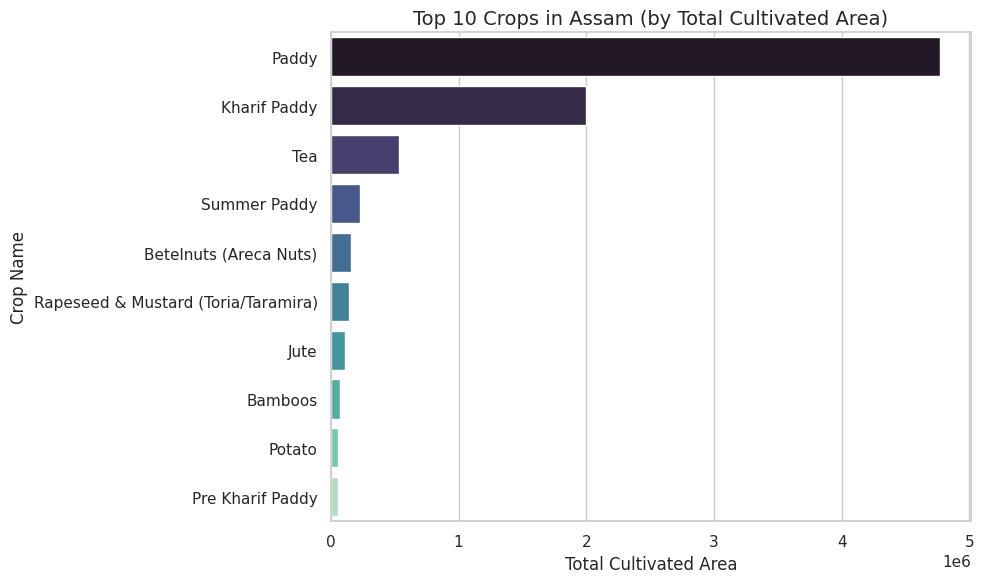

In [ ]:
# -------------------------------------------------------------------
# 🧮 STEP 1: Compute total cultivated area of each crop per state
# -------------------------------------------------------------------
state_crop_area = (
    df.groupby(['state_name', 'crop_name'])['total_ar_district']
    .sum()
    .reset_index()
)

# -------------------------------------------------------------------
# 🏆 STEP 2: Get top 10 crops per state
# -------------------------------------------------------------------
top10_crops_per_state = (
    state_crop_area.sort_values(['state_name', 'total_ar_district'], ascending=[True, False])
    .groupby('state_name')
    .head(10)
)

# Display the table of top 10 crops per state
print("✅ Top 10 Crops by Total Cultivated Area for Each State:\n")
print(top10_crops_per_state.head(30))  # show sample

# -------------------------------------------------------------------
# 📊 STEP 3: Visualization — Top 10 Crops for a Selected State
# -------------------------------------------------------------------
# Example: Change 'Assam' to any state you want
selected_state = "Assam"

state_data = top10_crops_per_state[top10_crops_per_state['state_name'] == selected_state]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=state_data,
    x='total_ar_district',
    y='crop_name',
    palette='mako'
)
plt.title(f"Top 10 Crops in {selected_state} (by Total Cultivated Area)", fontsize=14)
plt.xlabel("Total Cultivated Area")
plt.ylabel("Crop Name")
plt.tight_layout()
plt.show()

# Linear Regression

In [ ]:
#Implementing machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# 🧹 Select relevant columns for regression
data = df[['irr_ar_district', 'total_ar_district']].dropna()

# 🧮 Define Features (X) and Target (Y)
X = data[['irr_ar_district']]   # Independent variable
Y = data['total_ar_district']   # Dependent variable

In [ ]:
# ✂️ Train-Test Split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# 🤖 Initialize and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# 🔍 Predictions
Y_pred = model.predict(X_test)

In [ ]:
# 📊 Model Parameters
print("Intercept (β0):", model.intercept_)
print("Coefficient (β1):", model.coef_[0])

Intercept (β0): 109.90749805095047
Coefficient (β1): 1.2146329733094636


In [ ]:
# 📈 Evaluation Metrics
print("R² Score:", r2_score(Y_test, Y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(Y_test, Y_pred))

R² Score: 0.5521540757026209
Mean Squared Error (MSE): 2882128.5296364096


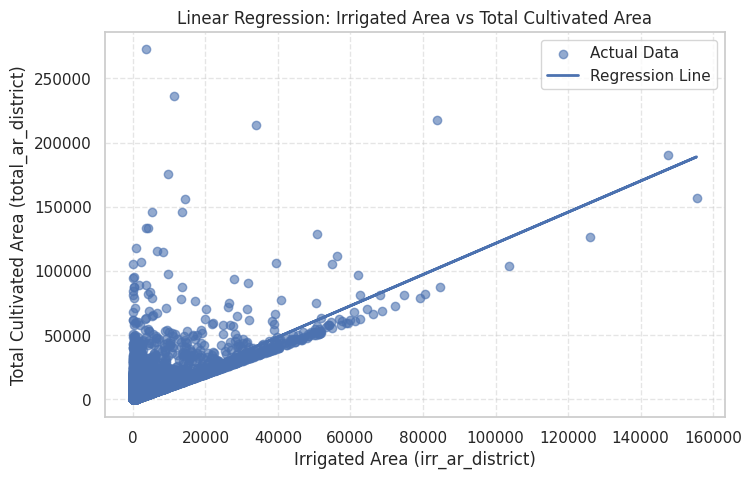

In [ ]:
# 🎨 Plot Regression Line
plt.figure(figsize=(8, 5))
plt.scatter(X_test, Y_test, label='Actual Data', alpha=0.6)
plt.plot(X_test, Y_pred, label='Regression Line', linewidth=2)
plt.title("Linear Regression: Irrigated Area vs Total Cultivated Area")
plt.xlabel("Irrigated Area (irr_ar_district)")
plt.ylabel("Total Cultivated Area (total_ar_district)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

 model accuracy 55-59 kyu aa ra hai , hamne outliers nai hatae the, kyuki outliers hataunga to dataset pe impact padenga , isiliye outliers nahi hatae,

isko karne ke 2 method
1)log transformation
2)winsorization

INSIGHTS THAT WE HAVE GOT :-
Type	Insight



🔹 Relationship -	Whether increase in irrigated area leads to an increase in total cultivated area.


🔹 Strength of Relation -	R² value shows how strongly irrigation impacts total cultivation.


🔹 Trend -	Positive slope ⇒ irrigation directly supports higher cultivated area; Negative ⇒ over-irrigation or low returns.


🔹 Policy Use - 	Helps identify if investment in irrigation yields proportional growth in agriculture.

 ## Multiple Linear Regression: Predict total_ar_district

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
# Display columns to verify
print(df.columns)

Index(['id', 'year', 'state_name', 'state_code', 'district_name',
       'district_code', 'social_group', 'farm_size_class',
       'farm_size_category', 'crop_name', 'crop_code', 'crop_type',
       'hold_no_district', 'irr_ar_district', 'unirr_ar_district',
       'total_ar_district'],
      dtype='object')


In [ ]:
# STEP 3: Select Features & Target
# ---------------------------
features = ["crop_name", "crop_type", "state_name", "irr_ar_district", "unirr_ar_district"]
target = "total_ar_district"

In [ ]:
# Remove rows with missing target
df = df.dropna(subset=[target])

X = df[features]
y = df[target]

In [ ]:
# STEP 4: Handle Categorical Variables using OneHotEncoder
# ---------------------------
categorical_features = ["crop_name", "crop_type", "state_name"]
numeric_features = ["irr_ar_district", "unirr_ar_district"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

In [ ]:
# STEP 5: Build Pipeline with Linear Regression
# ---------------------------
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [ ]:
# STEP 6: Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# STEP 7: Train the Model
# ---------------------------
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['crop_name', 'crop_type',
                                                   'state_name']),
                                                 ('num', 'passthrough',
                                                  ['irr_ar_district',
                                                   'unirr_ar_district'])])),
                ('regressor', LinearRegression())])

In [ ]:
# 🔍 Predictions
Y_pred = model.predict(X_test)

In [ ]:
print("\n📊 MODEL PERFORMANCE")
print("R² Score: ", r2_score(y_test, Y_pred))
print("MAE: ", mean_absolute_error(y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, Y_pred)))



📊 MODEL PERFORMANCE
R² Score:  0.9999999999996366
MAE:  0.0002481638941642414
RMSE:  0.001529325927803365


In [ ]:
# STEP 9: Example Prediction
# ---------------------------
sample = pd.DataFrame({
    "crop_name": ["Rice"],
    "crop_type": ["Food Crop"],
    "state_name": ["Maharashtra"],
    "irr_ar_district": [5000],
    "unirr_ar_district": [2000]
})

In [ ]:
pred = model.predict(sample)
print(f"\n🔮 Predicted Total Cultivated Area: {pred[0]:.2f}")


🔮 Predicted Total Cultivated Area: 7000.00


## Random Forest Regression – Full Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# 🧹 Select important features & target
features = ["crop_name", "crop_type", "state_name", "farm_size_category",
            "irr_ar_district", "unirr_ar_district"]
target = "total_ar_district"

data = df[features + [target]].dropna()


In [ ]:
  # 🔠 Label Encoding for categorical columns
label_encoders = {}
for col in ["crop_name", "crop_type", "state_name", "farm_size_category"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# 🔍 Define X and y
X = data.drop(columns=[target])
y = data[target]

In [ ]:
# ✂️ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 🌲 Initialize and Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
# 🔮 Predictions
y_pred = rf_model.predict(X_test)


NameError: name 'rf_model' is not defined

In [ ]:
# 📊 Evaluation
print("✅ Random Forest Model Performance")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


✅ Random Forest Model Performance
R² Score: 0.9986252188980721
Mean Squared Error (MSE): 5910.3180952869725


In [ ]:
# 🎯 Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\n🔥 Feature Importance:\n", feature_importance.sort_values(ascending=False))



🔥 Feature Importance:
 irr_ar_district       0.613150
unirr_ar_district     0.382302
farm_size_category    0.001374
crop_type             0.001292
crop_name             0.001240
state_name            0.000642
dtype: float64


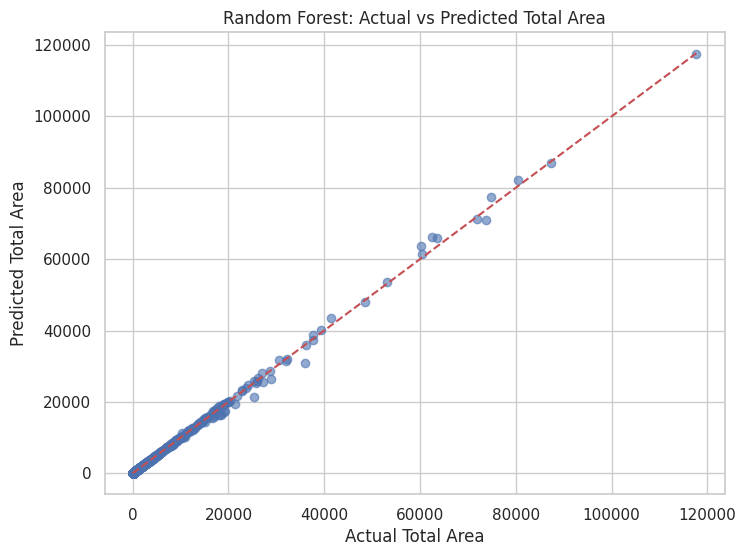

In [ ]:
# 📈 Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted Total Area")
plt.xlabel("Actual Total Area")
plt.ylabel("Predicted Total Area")
plt.grid(True)
plt.show()

#we have used random forest above to reduce overfittig and increase accuracy as it used multiple decision trees

#**Identify** which crops often occur together in districts wise. -pattern mining


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# Keep only district and crop name
crop_data = df[['district_name', 'crop_name']].dropna()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Group crops per district into list (basket format)
transactions = crop_data.groupby('district_name')['crop_name'].apply(list).values.tolist()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Convert transactions to one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Apriori Algorithm Crashed because used  up all of the available RAM, and dataset is too large

Insights :- Identify which crops often occur together in districts.  Nikal ne ka try kar ra tha but nikal nai paya

In [ ]:
# Apply Apriori Algorithm to find frequent crop combinations
#frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)  # support = frequency threshold
#frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)


Backward Elimination has already been performed in EDA, jo dataset hte jisse maine total aread nikala jisse  mujhe imp features mile ussi ko implement kar diya

# CLUSTERING

Here we can do clustering on two things ,
1)clustering 1:- Find district clusters with similar farming characteristics.
2)clustering 2:- Group crops that behave similarly across states (e.g., crops with high irrigation dependency).

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# 🧹 Select relevant features for clustering
features = ["crop_type", "farm_size_category", "irr_ar_district", "unirr_ar_district", "total_ar_district"]


In [ ]:
data = df[["district_name"] + features].dropna()

In [ ]:
# 🔠 Encode Categorical Columns
label_encoders = {}
for col in ["crop_type", "farm_size_category"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [ ]:
# 🎯 Prepare data for clustering
X = data.drop(columns=["district_name"])


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Select features
X = data.drop(columns=["district_name"])

# 🔠 Convert any remaining strings to numbers
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# 📏 Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


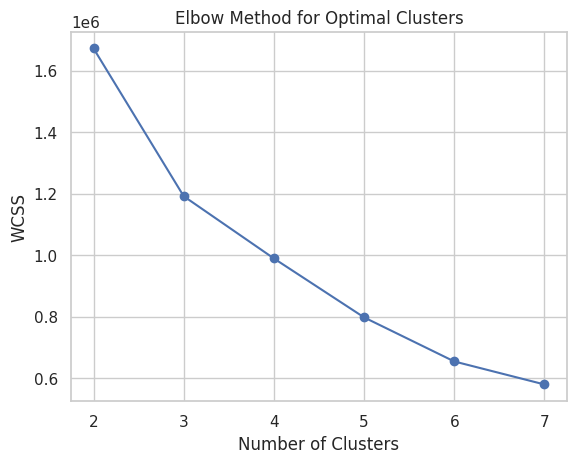

In [ ]:
# 🔍 Optimal cluster detection using Elbow Method (Optional to show WCSS)
inertia_list = []
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
plt.plot(range(2, 8), inertia_list, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

We have used Elbow method to find out ki hamene kitne clusters use karne cahiye hamaer data set ke hisab se


In [ ]:
# 🧪 Apply K-Means Clustering (Choose k = 4 for example)
kmeans = KMeans(n_clusters=4, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)


In [ ]:
# 🗂 Group districts by cluster
cluster_groups = data.groupby("Cluster")["district_name"].apply(list)

print("🏷 Districts clustered by farming similarity:")
print(cluster_groups)

🏷 Districts clustered by farming similarity:
Cluster
0    [Nicobars, Nicobars, Nicobars, Nicobars, Nicob...
1    [Nicobars, Nicobars, Nicobars, Nicobars, Nicob...
2    [Nicobars, Nicobars, Nicobars, Nicobars, Nicob...
3    [Adilabad, Adilabad, Adilabad, Adilabad, Adila...
Name: district_name, dtype: object


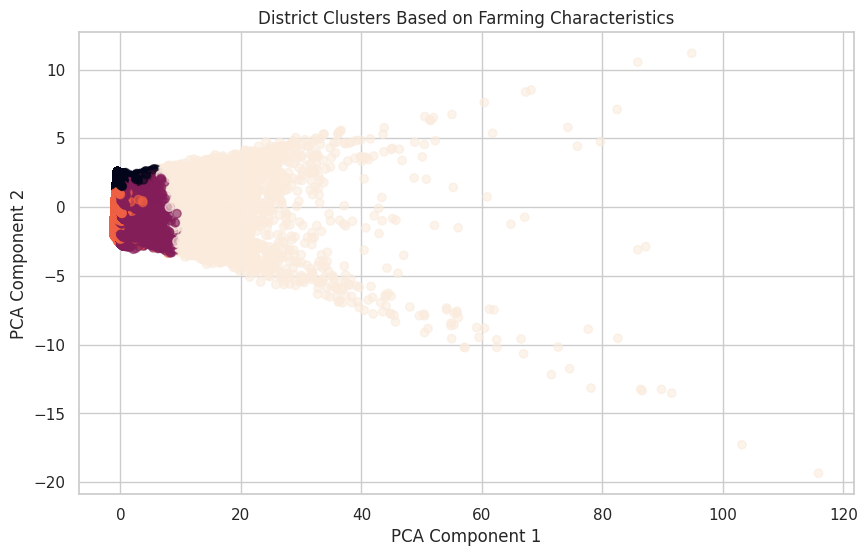

In [ ]:
from sklearn.decomposition import PCA

# 🎯 Apply PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 🖼 Plot Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["Cluster"], alpha=0.6)
plt.title("District Clusters Based on Farming Characteristics")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Next

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)


Text(0.5, 0.92, '3D PCA Clustering of Districts')

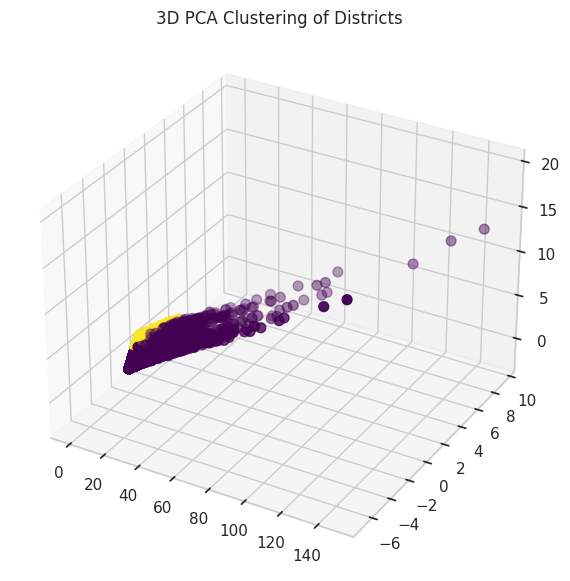

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels, cmap='viridis', s=50)
ax.set_title('3D PCA Clustering of Districts')

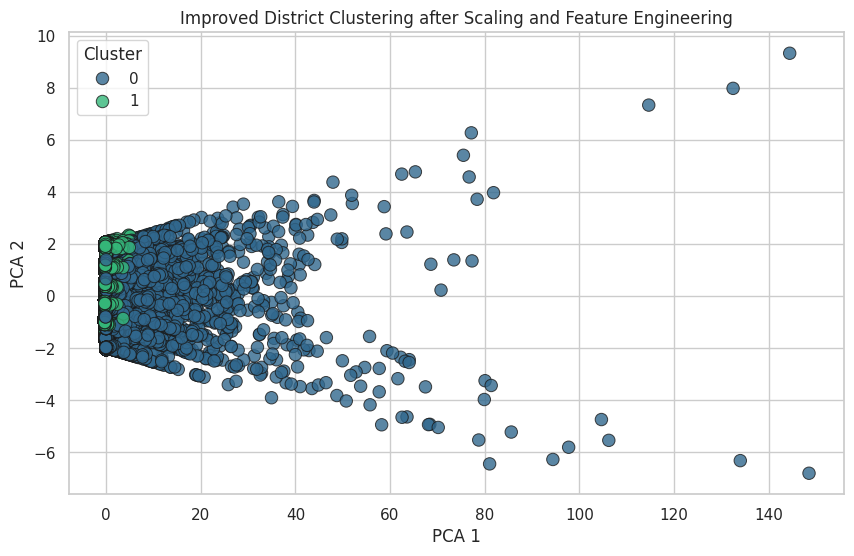

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='viridis', s=80, alpha=0.8, edgecolor='k'
)
plt.title('Improved District Clustering after Scaling and Feature Engineering')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.legend(title='Cluster')

Example Cluster   |	Interpretation

Cluster 0 (Green)	 | High total area + high irrigation → Intensively farmed regions


Cluster 1 (Blue)	 | Low irrigation + low holdings → Rainfed, low-input regions

**CLUSTER 2**

In [ ]:
crop_group = df.groupby("crop_name").agg({
    "irr_ar_district": "sum",
    "unirr_ar_district": "sum",
    "total_ar_district": "sum",
    "hold_no_district": "sum"
}).reset_index()

In [ ]:
crop_group["Irrigation_Ratio"] = (
    crop_group["irr_ar_district"] /
    crop_group["total_ar_district"].replace(0, np.nan)
)
crop_group["Unirrigation_Ratio"] = (
    crop_group["unirr_ar_district"] /
    crop_group["total_ar_district"].replace(0, np.nan)
)
crop_group = crop_group.fillna(0)

In [ ]:
X = crop_group[[
    "irr_ar_district",
    "unirr_ar_district",
    "total_ar_district",
    "Irrigation_Ratio",
    "Unirrigation_Ratio"
]]

# 5️⃣ Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

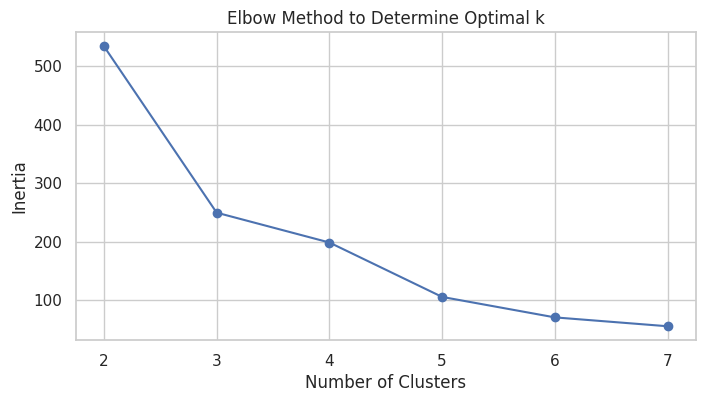

In [ ]:
inertias = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2,8), inertias, marker='o')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
crop_group["Cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
crop_group["PCA1"] = pca_result[:,0]
crop_group["PCA2"] = pca_result[:,1]

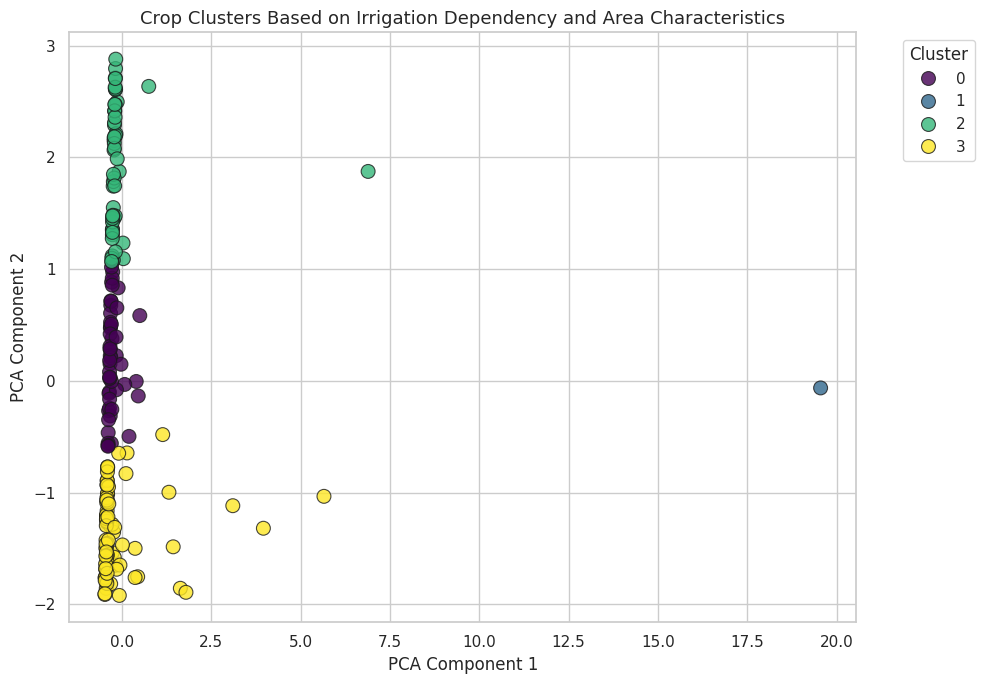

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=crop_group, x="PCA1", y="PCA2", hue="Cluster",
    palette="viridis", s=100, alpha=0.8, edgecolor='k'
)
plt.title("Crop Clusters Based on Irrigation Dependency and Area Characteristics", fontsize=13)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The clustering reveals distinct groups of crops based on their irrigation dependency and cultivation patterns across states, identifying which crops rely heavily on irrigation, which thrive under rainfed conditions, and which show balanced or specialized water-use behaviors.

In [ ]:
for i in sorted(crop_group["Cluster"].unique()):
    print(f"\n🌾 Cluster {i}: Crops with similar irrigation patterns")
    print(crop_group[crop_group["Cluster"] == i]["crop_name"].head(10).to_string(index=False))


🌾 Cluster 0: Crops with similar irrigation patterns
             Alovera
        Aonla (Amla)
               Apple
             Asgandh
     Bacopa Monnieri
              Barley
       Beans (Green)
Bottle Guard (Lauki)
             Cabbage
              Carrot

🌾 Cluster 1: Crops with similar irrigation patterns
Paddy

🌾 Cluster 2: Crops with similar irrigation patterns
   Amaranths (Chaulai)
    Anthurium (Flower)
                Banana
             Beetlvine
              Beetroot
Betelnuts (Areca Nuts)
          Bitter Guard
               Brinjal
      Cardamum (Small)
           Cauliflower

🌾 Cluster 3: Crops with similar irrigation patterns
        Ajwain
        Almond
       Apricot
         Bajra
       Bamboos
Beans (Pulses)
           Bel
           Ber
  Bread Fruits
         Canes


In [ ]:
# Drop obvious duplicates
df = df.drop_duplicates()

# Sanity check: total area consistency (optional)
if all(c in df.columns for c in ["irr_ar_district","unirr_ar_district","total_ar_district"]):
    df["total_from_parts"] = df["irr_ar_district"] + df["unirr_ar_district"]
    # If large mismatch, keep a note (do not overwrite official total)
    mismatch_rate = (np.abs(df["total_from_parts"] - df["total_ar_district"]) > 1e-6).mean()
    print(f"Total mismatch rate: {mismatch_rate:.2%}")